# House price prediction

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as skpre

In [7]:
df = pd.read_csv("housepriceMKclean.csv")
df = df.astype({
    "Area": int ,
    'Room' : int , 
    'Parking' : int , 
    'Warehouse' : int , 
    'Elevator' : int ,
    'Address' : str ,
    'Price' : float , 
    'Price(USD)' : float
})
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,1000,2,1,1,0,Damavand,7.000000e+09,233333.33
1,929,5,1,1,0,Zafar,8.000000e+10,2666666.67
2,900,3,1,1,0,Damavand,8.500000e+09,283333.33
3,863,2,1,1,1,Gheitarieh,7.830000e+09,261000.00
4,750,5,1,1,1,Mahmoudieh,7.500000e+10,2500000.00


In [9]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3.453000e+03,3.453000e+03
mean,107.238923,2.081089,0.847379,0.914857,0.787142,5.376473e+09,1.792158e+05
std,71.295250,0.759889,0.359674,0.279135,0.409388,8.122912e+09,2.707637e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.420000e+09,4.733333e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,1000.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


- map kardane manategh Tehran

district_map = {
    'Damavand': 22,
    'Zafar': 3,
    'Gheitarieh': 1,
    'Mahmoudieh': 1,
    'Varamin - Beheshti': 20,
    'Abazar': 18,
    'Ekhtiarieh': 1,
    'Lavasan': 22,
    'Absard': 22,
    'Tajrish': 1,
    'Qalandari': 13,
    'North Program Organization': 1,
    'Dorous': 3,
    'Gandhi': 3,
    'Niavaran': 1,
    'Andisheh': 18,
    'Zaferanieh': 1,
    'Amirabad': 6,
    'Elahieh': 1,
    'Mirdamad': 3,
    'Shahedshahr': 21,
    'Shahryar': 21,
    'Pasdaran': 3,
    'Jordan': 6,
    'Saadat Abad': 2,
    'Farmanieh': 1,
    'Sattarkhan': 6,
    'Aqdasieh': 1,
    'Ajudaniye': 1,
    'Argentina': 1,
    'Velenjak': 1,
    'Baghestan': 18,
    'Golestan': 18,
    'Vanak': 3,
    'Shahrake Gharb': 5,
    'Kamranieh': 1,
    'Yousef Abad': 6,
    'Persian Gulf Martyrs Lake': 1,
    'Dezashib': 18,
    'Islamshahr': 18,
    'Heravi': 18,
    'Azarbaijan': 18,
    'Pakdasht': 18,
    'East Ferdows Boulevard': 8,
    'Marzdaran': 14,
    'Narmak': 8,
    'West Ferdows Boulevard': 8,
    'Araj': 21,
    'Air force': 18,
    'Dehkade Olampic': 21,
    'Kahrizak': 21,
    'Kook': 5,
    'Ozgol': 21,
    'Rudhen': 22,
    'Sadeghieh': 5,
    'Southern Chitgar': 22,
    'West Pars': 22,
    'Punak': 22,
    'Zargandeh': 22,
    'Northern Chitgar': 22,
    'Parand': 21,
    'ShahrAra': 21,
    'Waterfall': 1,
    'Valiasr': 6,
    'Mahallati': 21,
    'Heshmatieh': 21,
    'Ostad Moein': 6,
    'Azadshahr': 18,
    'Pardis': 21,
    'Qarchak': 21,
    'Shahrake Qods': 21,
    'Beryanak': 18,
    'Chardangeh': 22,
    'Karimkhan': 6,
    'Pirouzi': 13,
    'Salsabil': 13,
    'Shahr-e-Ziba': 21,
    'Daryan No': 18,
    'Koohsar': 1,
    'Central Janatabad': 5,
    'Gholhak': 3,
    'Haft Tir': 6,
    'Jeyhoon': 6,
    'Chardivari': 22,
    'Railway': 18,
    'Northern Janatabad': 5,
    'Shahrake Quds': 21,
    'Gisha': 5,
    'Mehran': 5,
    'Northren Jamalzadeh': 5,
    'Shams Abad': 18,
    'Southern Janatabad': 5,
    'Qasr-od-Dasht': 7,
    'SabaShahr': 21,
    'Seyed Khandan': 6,
    'Tenant': 1,
    'Sohanak': 1,
    'Southern Suhrawardi': 13,
    'Ray': 21,
    'Feiz Garden': 6,
    'Khademabad Garden': 21,
    'Mehrabad': 18,
    'Northern Suhrawardi': 13,
    'Shahrakeh Naft': 21,
    'Shahran': 5,
    'Shahrake Apadana': 21,
    'Garden of Saba': 21,
    'Hakimiyeh': 18,
    'Islamshahr Elahieh': 18,
    'Nasim Shahr': 21,
    'Tehransar': 5,
    'Nezamabad': 18,
    'Ghoba': 6,
    'Keshavarz Boulevard': 6,
    'Afsarieh': 13,
    'Fatemi': 6,
    'Majidieh': 8,
    'Mehrabad River River': 18,
    'Southern Program Organization': 1,
    'Tarasht': 5,
    'East Pars': 13,
    'Water Organization': 1,
    'Zibadasht': 21,
    'Darabad': 1,
    'Salehabad': 21,
    'Chidz': 1,
    'Eram': 21,
    'Hekmat': 13,
    'Shahrake Madaen': 21,
    'Si Metri Ji': 9,
    'Tehran Now': 1,
    'Parastar': 21,
    'Safadasht': 21,
    'Hor Square': 6,
    'Lavizan': 1,
    'Mirza Shirazi': 6,
    'Qazvin Imamzadeh Hassan': 13,
    'Razi': 6,
    'Moniriyeh': 6,
    'Hashemi': 18,
    'Amirieh': 6,
    'Ekbatan': 5,
    'Nawab': 6,
    'Republic': 6,
    'Taslihat': 21,
    'Villa': 2,
    'Amir Bahador': 11,
    'Atabak': 6,
    'Fallah': 13,
    'Kazemabad': 18,
    'Sabalan': 5,
    'Abbasabad': 18,
    'Karoon': 21,
    'Pakdasht KhatunAbad': 18,
    'Shahrake Azadi': 21,
    'Shahrake Shahid Bagheri': 21,
    'Firoozkooh Kuhsar': 22,
    'Komeil': 6,
    'Vahidiyeh': 18,
    'Abuzar': 18,
    'Elm-o-Sanat': 6,
    'Yaftabad': 18,
    'Dolatabad': 21,
    'Boloorsazi': 18,
    'Pishva': 21,
    'Baqershahr': 21,
    'Ghiyamdasht': 18,
    'Firoozkooh': 22,
    'Chahardangeh': 22,
    'Malard': 21,
    'Darband': 1,
    'Eskandari': 6,
    'Telecommunication': 18,
    'Aliabad South': 18,
    'Darakeh': 1,
    'Azari': 18,
    'Bahar': 6,
    'Enghelab': 6,
    'Shadabad': 18,
    'Ahang': 6,
    'Yakhchiabad': 21,
    'Hassan Abad': 6,
    'Alborz Complex': 18,
    'Robat Karim': 21,
    'Javadiyeh': 18,
    'Shoosh': 18,
    'Thirteen November': 18,
    'Vahidieh': 18,
    'Khavaran': 21,
    'Ray - Montazeri': 21,
    'Ray - Pilgosh': 21,
    'Naziabad': 18
}

    # ... بقیه مناطق




df['Code'] = df['Address'].map(district_map)

# فرض کنیم df دیتافریم تو هست و ستون آدرسش 'Address' نام داره

# ابتدا کل مقادیر یکتا آدرس‌ها
unique_addresses = df['Address'].unique()

# حالا لیست مناطق مپ شده (کل کلیدهای دیکشنری)
mapped_addresses = set(district_map.keys())

# آدرس‌هایی که مپ نشده یا None یا نال هستن:
unmapped = [addr for addr in unique_addresses if (addr not in mapped_addresses) or (district_map.get(addr) is None) or (pd.isna(addr))]

print("آدرس‌هایی که مپ نشدن یا نال هستند:")
print(unmapped)


import numpy as np

# محاسبه میانگین قیمت و متراژ به ازای هر منطقه
region_stats = df.groupby('Address').agg({'Price': 'mean', 'Area': 'mean'}).reset_index()

def guess_region(price, area):
    distances = np.sqrt((region_stats['Price'] - price)**2 + (region_stats['Area'] - area)**2)
    idx_min = distances.idxmin()
    return region_stats.loc[idx_min, 'Address']

# نمونه استفاده
price_sample = 20000000000  # قیمت به تومان
area_sample = 80  # متراژ به متر

print("منطقه حدس زده شده:", guess_region(price_sample, area_sample))


In [13]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator','Address','Price']]
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,1000,2,1,1,0,Damavand,7.000000e+09
1,929,5,1,1,0,Zafar,8.000000e+10
2,900,3,1,1,0,Damavand,8.500000e+09
3,863,2,1,1,1,Gheitarieh,7.830000e+09
4,750,5,1,1,1,Mahmoudieh,7.500000e+10


In [15]:
cdf = pd.get_dummies(cdf,columns=['Address'])
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,1000,2,1,1,0,7.000000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,929,5,1,1,0,8.000000e+10,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,900,3,1,1,0,8.500000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,863,2,1,1,1,7.830000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,750,5,1,1,1,7.500000e+10,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


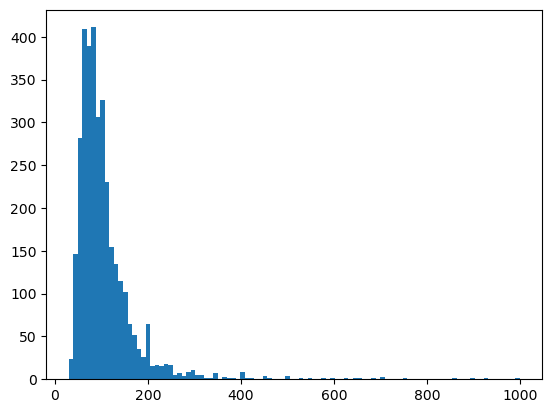

In [17]:
plt.hist(cdf.Area , bins=100)
plt.show()

In [19]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'{column} Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    
    # حذف ردیف هایی که مقدار ستون موردنظر خارج از بازه مجاز هست
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


In [21]:
df_no_outliers_area = remove_outliers_iqr(cdf, 'Area')

# حذف اوت لایرهای قیمت از دیتافریم پاک شده بالا
df_no_outliers = remove_outliers_iqr(df_no_outliers_area, 'Price')

print(f"تعداد ردیف‌ها بعد از حذف اوت‌لایرها: {len(df_no_outliers)}")

Area Lower bound: -7.5, Upper bound: 196.5
Price Lower bound: -4400000000.0, Upper bound: 10800000000.0
تعداد ردیف‌ها بعد از حذف اوت‌لایرها: 3000


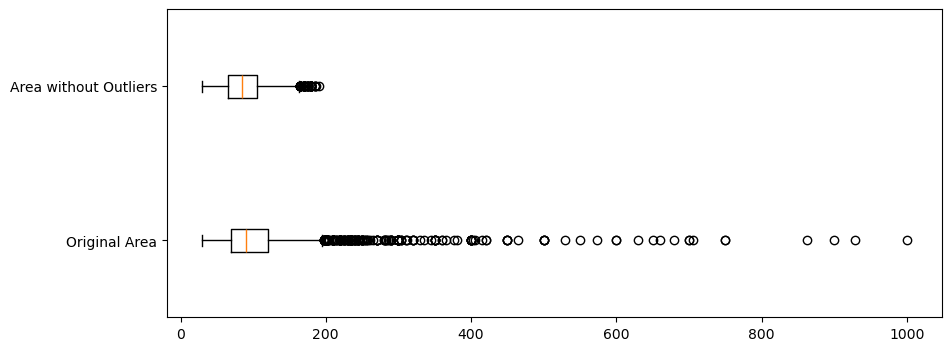

In [23]:
plt.figure(figsize=(10,4))
plt.boxplot([cdf.Area,df_no_outliers.Area] ,vert=False)
plt.yticks([1, 2], ['Original Area', 'Area without Outliers'])
plt.show()

In [30]:
data = df_no_outliers
from sklearn.model_selection import train_test_split
X = data.drop('Price',axis=1)
Y = data['Price']
x_train ,x_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [32]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
regr = LinearRegression()
regr.fit(x_train,y_train)
y_hat = regr.predict(x_test)
r2 = metrics.r2_score(y_test,y_hat)
MAE = metrics.mean_absolute_error(y_test,y_hat)
print(f" R2 = {r2:0.2f} , MAE = {MAE:0.2f}")

 R2 = -4281961524332162.50 , MAE = 16401148660363794.00
